### 성적 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[2,20],[4,40],[6,60],[9,90]],
                   index=["해도","병관","은비","수현"],
                   columns=["시간","성적"])
data

,시간,성적
해도,2,20
병관,4,40
은비,6,60
수현,9,90


#### 수학공식을 이용한 모델

In [3]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(data[["시간"]],data["성적"])

LinearRegression()

In [4]:
# R2 score= 1-mse/표준편차
linear.score(data[["시간"]],data["성적"])

1.0

In [5]:
# w, b를 출력
print("w : ",linear.coef_)
print("b : ",linear.intercept_)

w :  [10.]
b :  -7.105427357601002e-15


In [6]:
linear.predict([[7]])

array([70.])

### 경사하강법을 이용해서 회귀분석

In [7]:
# 경사하강법 : 모든데이터에 대해서 기울기를 계산 : 너무 느림
# 확률적 경사하강법 : 일부 데이터만 샘플링 해서 기울기를 계산
from sklearn.linear_model import SGDRegressor

# max_iter : 몇번 반복할 것인지
# eta : 학습률
sgd = SGDRegressor(max_iter=5000,
                   eta0=0.01, verbose=1)
sgd.fit(data[["시간"]],data["성적"])

-- Epoch 1
Norm: 7.99, NNZs: 1, Bias: 1.170238, T: 4, Avg. loss: 936.617207
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.24, NNZs: 1, Bias: 1.326765, T: 8, Avg. loss: 39.183222
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.58, NNZs: 1, Bias: 1.372006, T: 12, Avg. loss: 3.897111
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.71, NNZs: 1, Bias: 1.387213, T: 16, Avg. loss: 0.757318
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.75, NNZs: 1, Bias: 1.388397, T: 20, Avg. loss: 0.313747
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.77, NNZs: 1, Bias: 1.384965, T: 24, Avg. loss: 0.232564
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.78, NNZs: 1, Bias: 1.382012, T: 28, Avg. loss: 0.220027
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.79, NNZs: 1, Bias: 1.379177, T: 32, Avg. loss: 0.206198
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.79, NNZs: 1, Bias: 1.374503, T: 36, Avg. loss: 0.203742
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=5000, verbose=1)

In [8]:
sgd.score(data[["시간"]],data["성적"])

0.9996807485752534

In [9]:
sgd.predict([[7]])

array([69.92622825])

#### 보스턴 집값 데이터를 이용한 회귀 분석

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()
# data : 특성 데이터
# target : 라벨데이터
# feature_names : 컬럼의 이름

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
data_df = pd.DataFrame(boston.data, columns=boston.feature_names)
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
target_df=pd.DataFrame(boston.target, columns=["price"])
target_df

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [13]:
# axis=1 가로방향으로 병합
boston_df = pd.concat([data_df,target_df],axis=1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

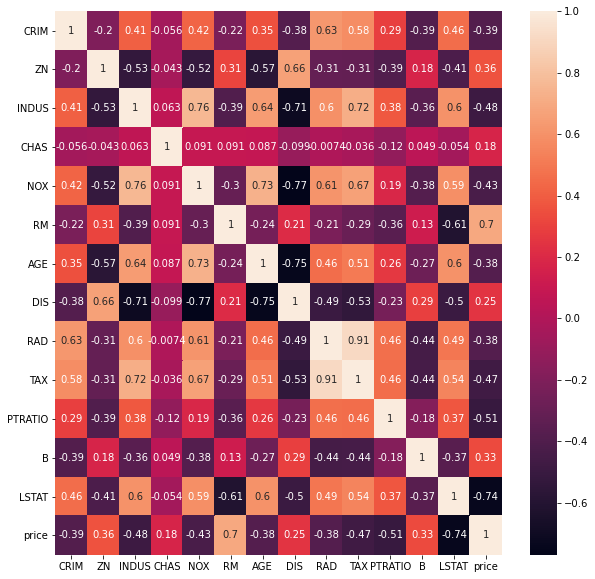

In [14]:
import seaborn as sb

plt.figure(figsize=(10,10))
sb.heatmap(boston_df.corr(), annot=True)

In [15]:
# 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df,target_df,random_state=777)

In [16]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [17]:
# 회귀분석의 평가는 오차를 이용하므로 mse를 사용
from sklearn.metrics import mean_squared_error

pred_train = linear.predict(X_train)
pred_test = linear.predict(X_test)
print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

21.851070078329464
22.971490334406354


#### 규제를 사용한 과대적합 감소

- Ridge : 특성수가 적은 경우에 상관관계가 큰 컬럼과 작은 컬럼의 차이를 줄여서 작은 컬럼도 사용하는 것
- Lasso : 특성수가 많은 경우에 상관관계가 적은 컬럼을 제거 -> 특성 선택에 사용

In [18]:
from sklearn.linear_model import Ridge, Lasso

# alpha =0.1: 규제값
ridge= Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [19]:
ridge_pred_train=ridge.predict(X_train)
ridge_pred_test=ridge.predict(X_test)

print(mean_squared_error(ridge_pred_train,y_train))
print(mean_squared_error(ridge_pred_test,y_test))

21.862183071097885
22.706503966790766


In [20]:
lasso_pred_train=lasso.predict(X_train)
lasso_pred_test=lasso.predict(X_test)

print(mean_squared_error(lasso_pred_train,y_train))
print(mean_squared_error(lasso_pred_test,y_test))

23.351722349297923
22.22541006280776


### Logistic Regression
- 비선형 이진 분류 모델

In [21]:
import pandas as pd

In [22]:
wine = pd.read_csv("./data/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [23]:
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=999)

In [46]:
from sklearn.linear_model import LogisticRegression

# C : 작을수록 규제를 강하게 함(사용되는 특성이나 데이터 수를 줄여주는 것)
lr = LogisticRegression(C=0.01,max_iter=15000)
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=15000)

In [47]:
print("훈련 : ",lr.score(X_train,y_train))
print("테스트 : ",lr.score(X_test,y_test))

훈련 :  0.9493021346469622
테스트 :  0.9452307692307692


In [48]:
from sklearn.model_selection import GridSearchCV
# GridSearch로 최적의 C 값을 찾아보자
param={"C":[0.001,0.01,0.1,1,10,100,1000]}

gs = GridSearchCV(LogisticRegression(max_iter=15000,random_state=777),param, cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=15000, random_state=777),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [49]:
print("훈련 : ",gs.score(X_train,y_train))
print("테스트 : ",gs.score(X_test,y_test))

훈련 :  0.9891215106732348
테스트 :  0.9876923076923076


In [50]:
gs.best_params_

{'C': 100}